# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading

Fandango displays a 5-star rating system on their website, where the minimun raring is 0 stars and the maximum is 5 strs

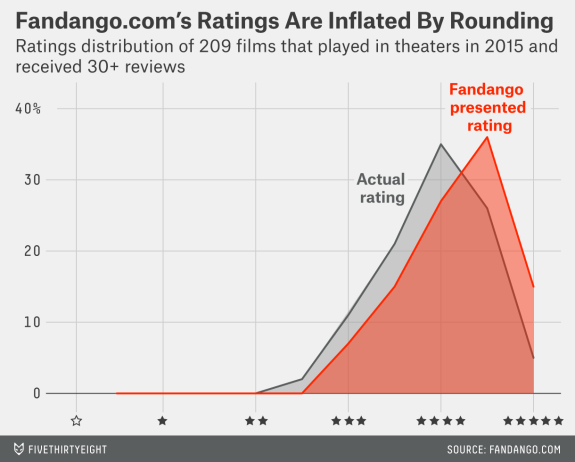

In [1]:
import IPython
IPython.display.Image("fandango_actual_vs_displayed.png")

The above image shows that is there something fishy with fandango presented rating as against the actual rating, part of the research made by Walt Hickey showed that the actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4.0 .

Fandango's officials replied that the biased rounding off was caused by a bug in their sytem rather then being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project we will analyze more recent movie ratings data to determine whether there has been any chnage in Fandango's rating sytrm after Hickey's analysis.

One of the best ways to figure out whether there has been any change in Fandango's rating sytem after Hickey's analysis is to compare the sytems's characteristics proevious and after the analysis. Fortunately, we have ready-made data for both these periods of time.
- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We will use the data he collected to analyze the characteristics of fandango's rating sytem previous to his analysis( which is up to 2015)
- on of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we will use it to analyze the rating sytem's characteristics after Hickey's analysis 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')

In [3]:
fandango_score_comparison

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [4]:
movie_ratings_2016_2017 = pd.read_csv("movie_ratings_16_17.csv")
movie_ratings_2016_2017

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


our goal is to determine whether there has been any change in Fandango's rating sytem after Hickey's analysis. the columns that will help our analysis are "FILM", "Fandango_stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference" in the Hickey's dataset

and the "movie","year","fandango", in the dataquest members's datasets


In [5]:
fandango_before = fandango_score_comparison[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()

In [6]:
fandango_before.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
fandango_after = movie_ratings_2016_2017[['movie','year','fandango']].copy()

In [8]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


our goal is to determine whether there has been any change in Fandango's rating sytem after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we are interested in sampling the population at two different periods in time - previous and after Hickeys's analysis - so we can compare the two states.

The data we wer working with was sampled at the moments we want: one sample was tken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure tht the samples are representative, otherwise we should expect a large sampling error and ultimately wrong conclusions ( we might be using a fraction of the population which is not representative enouh to judge the entire population which will lead to bais conclusion.

checking through hickeys [README.md](https://github.com/mircealex/Movie_ratings_2016_17) of the data set repository and article, we could see that he used the following sampling criteria: 
-  The movie must had at least 30 fan ratings on Fandango's website at the timeof sampling (Aug. 24,2015)
- The movie must have had tickets on sale in 2015. 

The sampling was clearly not random because not every movie had the same chance to be included in the sample - some movies did not have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). it is questionable whether this sample is representative of the entire population we wre interested to describe. It seems more likely tat it is not temporal trends e.g movied in 2015 might have been outstandingly good or bad compared to other years. 

The sampling conditions for our second sample were ( as it can be read in the [README.md](https://github.com/mircealex/Movie_ratings_2016_17) of the data srt's reprository:

- The movies must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or ftom the data)

The second sample is also subject to temporal trends and it is unlikely to be representative of oyr population of interest.

From both sample criteria it is obvious that both researcher had certain research questions in  mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling methrod is called purposive sampling i.e sampling that had a certain set of population in mind. While these samples were good enough for their research, they don not seem too useful for our current analysis 



#  Changing the goal of our project

At this point, we can either collect new data( which is impossible since fandango has hid the actual rating on their website, so we cant collect new sample data for movies from 2015) or change the goal of our analysis. W e choose the letter and place some limitationa on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis,our new gioal is to determine whether there is any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

# Isolating the Samples We Need 

With this our new research goal, we have two populations of interest:
    1. All fandango's ratings for popular movies released in 2015
    2. All Fandango's ratings for popular movies released in 2016
We need to be clear about what counts as popular movies. We will use Hickey's benchmark of 30 fans ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website/

our second sample criteria is movie popularity, the sample dosen't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativivity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. 

In [9]:
fandango_after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [10]:
# getting the dataframe of the popular movies
pd.DataFrame({"Movie":["Mechanic: resurrection","warcraft","max steel","me before you","fantastic beasts and where to find them","cell","genius","sully","A Hologram for the king","Captain america: civil war"],"fan rating":["25,616","31,549","6,826","30,636","87,842","3,816","2885","48,476","10,215","179,905"]})

,Movie,fan rating
0,Mechanic: resurrection,"25,616"
1,warcraft,"31,549"
2,max steel,"6,826"
3,me before you,"30,636"
4,fantastic beasts and where to find them,"87,842"
5,cell,"3,816"
6,genius,2885
7,sully,"48,476"
8,A Hologram for the king,"10,215"
9,Captain america: civil war,"179,905"


About 90% of our sample datas have high fan rating popularity, with captain america having the highest fan rating

In [11]:
#checking if no movies has less than 30 ratings in hickeys datset
sum(fandango_before["Fandango_votes"] < 30)

0

In [12]:
fandango_before.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [13]:
fandango_after.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


from here we could see that fandango_before dataset dose not contain a separete column for year, but on checking the column we could see that the film is attached to the name. This can be done with reular expression



In [14]:
fandango_before['year'] = fandango_before["FILM"].str.extract(r"\((\d+)\)")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [15]:
fandango_before['year']

0      2015
1      2015
2      2015
3      2015
4      2015
5      2015
6      2015
7      2014
8      2015
9      2015
10     2015
11     2015
12     2014
13     2014
14     2014
15     2015
16     2015
17     2015
18     2014
19     2015
20     2015
21     2015
22     2015
23     2015
24     2015
25     2014
26     2015
27     2015
28     2014
29     2015
       ... 
116    2015
117    2015
118    2015
119    2015
120    2015
121    2015
122    2015
123    2015
124    2015
125    2015
126    2015
127    2015
128    2015
129    2015
130    2015
131    2015
132    2015
133    2015
134    2015
135    2015
136    2015
137    2015
138    2015
139    2015
140    2015
141    2015
142    2015
143    2014
144    2015
145    2015
Name: year, Length: 146, dtype: object

In [16]:
fandango_before.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


since the years we are dealing with in our dataset is 2015 and 2016 we need to check the years in hickeys's datset

In [17]:
fandango_before["year"].value_counts()

2015    129
2014     17
Name: year, dtype: int64

We could see that we have 2 unique years which are 2015 and 2014, we will need to that of 2015

In [20]:
fandango_2015 = fandango_before[pd.to_numeric(fandango_before["year"]) == 2015].copy()

In [21]:
fandango_2015.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [23]:
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [24]:
fandango_2016 = fandango_after[fandango_after['year']==2016].copy()

In [25]:
fandango_2016.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [27]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

our goal still remains the same, which is the determine whether there is any difference between Fandango's ratings for popular movies in 2015 and fandango's rating for popular movies in 2016

we will need to plot a kernel density plot for both data sets, this will help us to bettee visualize the difference

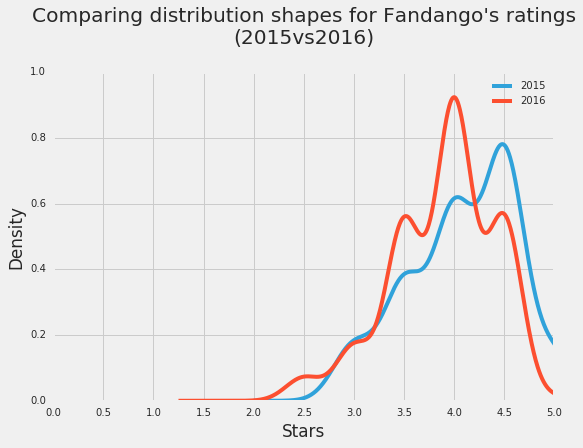

In [47]:
%matplotlib inline
import numpy as np
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize=(8,5.5))
fandango_2016['fandango'].plot.kde(label='2016',legend=True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015vs2016)",y=1.07)
plt.xlabel("Stars")
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.show()

Both shapes are negatively skewed but it seems that of 2015 is more skewed to the right compared to that of 2016 which looks like a normal distribution. Also the ratings started at less than 1.5 in 2016 unlike in 2015 that started at slighly above 2.0. Also we could see that in 2016 most of the films were rated 4.0 compared to that of 2015 which were rated 4.5. Thus shows that movies in 2016 were rated lower than that of 2015

# Comparing relative frequencies

For more analysis we need to find the frequency distributions of each distribution, there are two ways to accchive this, using the absolute frequencies or relative frequency. We will use the relative frequency because it shows the frequency as a function of the total as against one

In [50]:
fandango_2015["Fandango_Stars"].value_counts(normalize = True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [51]:
fandango_2016["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

from the frequency distribution, we could see that the rarings started from 2.5 in 2016 unlike that of 2015 which started in 3.0. Also we could see that there were fewer 5.0 ratings in 2016

# statistics summary


We confirmed that there are clear difference between the two distributions. However, the direction of the difference is not clear as it was on the kerneldensity plots. 

To get a more detailed analysis we would take the summary statistics of both distribuition, the summmary statistics are mean,medianand mode.

In [52]:
fandango_2015_mean = fandango_2015['Fandango_Stars'].mean()

In [53]:
fandango_2015_median = fandango_2015["Fandango_Stars"].median()

In [58]:
fandango_2015_mode = fandango_2015['Fandango_Stars'].mode()[0]


In [55]:
fandango_2016_mean = fandango_2016['fandango'].mean()

In [56]:
fandango_2016_median = fandango_2016['fandango'].median()

In [59]:
fandango_2016_mode = fandango_2016['fandango'].mode()[0]

In [65]:
summary = pd.DataFrame({'2015':[fandango_2015_mean,fandango_2015_median,fandango_2015_mode],'2016':[fandango_2016_mean,fandango_2016_median,fandango_2016_mode]},index = ["mean","median","mode"])

In [66]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


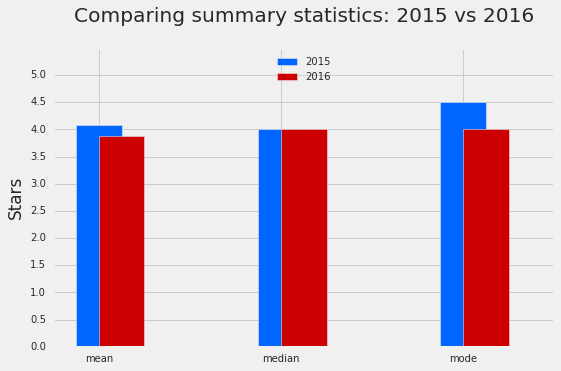

In [75]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color='#0066FF',align = 'center',label='2015',width=.25)
summary['2016'].plot.bar(color='#CC0000',align ='edge',label='2016',width=.25,rot=0,figsize=(8,5))
plt.title('Comparing summary statistics: 2015 vs 2016',y=1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,0.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0,loc = 'upper center')
plt.show()

We could ee that the mean rating waslowerin 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015

In [77]:
(summary.loc["mean"][0]-summary.loc['mean'][1])/summary.loc['mean'][0]

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the chnage we saw on the kernel density plot is confirmed: on average, popularmovies released in 2016 were rated slighly lower han popular movies realesedin 2015

# Conclusion

Our analysis showed thst there is indeed a slight difference between Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies relased in 2015.

We cannot be completely sure what cused the change, but the chances are very high that it was caused by Fandango fixing the biased rating sytem after Hickey;s analysis.